In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
import seaborn as sns
import pickle

read data

In [7]:
data = pd.read_csv('../../Data/cleaned_v1.csv')

split data

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data["Content_cleaned"], data["Label"], test_size= 0.3, random_state= 42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((17089,), (17089,), (7325,), (7325,))

extract feature

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer()
vector_train = tf_idf_vec.fit_transform(X_train)
vector_train

<17089x89758 sparse matrix of type '<class 'numpy.float64'>'
	with 2216622 stored elements in Compressed Sparse Row format>

turning parameters

In [18]:
param_grid = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly']}
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# Define grid search
grid_search = GridSearchCV(estimator=svm.SVC(), 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(vector_train, Y_train)
# Print grid search summary
grid_result.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

modeling

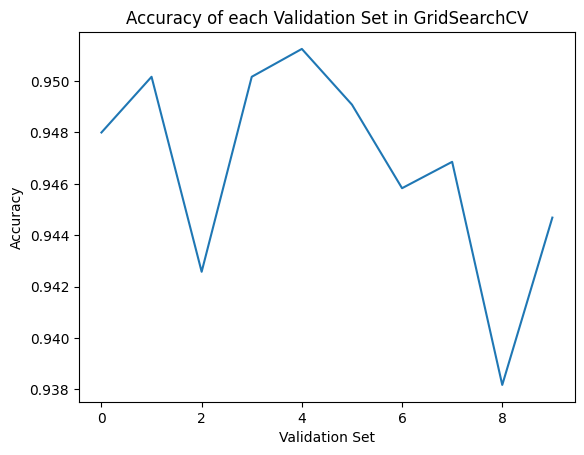

In [68]:
scores = [grid_search.cv_results_['split0_test_accuracy'], grid_search.cv_results_['split1_test_accuracy'], 
         grid_search.cv_results_['split2_test_accuracy'], grid_search.cv_results_['split3_test_accuracy'], 
         grid_search.cv_results_['split4_test_accuracy'], grid_search.cv_results_['split5_test_accuracy'], 
         grid_search.cv_results_['split6_test_accuracy'], grid_search.cv_results_['split7_test_accuracy'], 
         grid_search.cv_results_['split8_test_accuracy'], grid_search.cv_results_['split9_test_accuracy'], ]

# plot the accuracy scores for each fold using a box plot
max_scores = [max(x) for x in scores]
plt.plot(max_scores)
plt.xlabel('Validation Set')
plt.ylabel('Accuracy')
plt.title('Accuracy of each Validation Set in GridSearchCV')
plt.show()

In [12]:
classifier = svm.SVC(C=10, gamma=1, kernel="rbf")
classifier.fit(vector_train, Y_train)
vector_test = tf_idf_vec.transform(X_test)
y_pred = classifier.predict(vector_test)

In [13]:
# heatconmat(y_pred, Y_test)
print(classification_report(y_pred, Y_test, digits=4))

               precision    recall  f1-score   support

     business     0.9445    0.9232    0.9337      1328
    education     0.9531    0.9517    0.9524      1325
entertainment     0.9747    0.9555    0.9650      1169
       health     0.9675    0.9693    0.9684      1075
     politics     0.8851    0.9174    0.9009      1150
        sport     0.9845    0.9930    0.9887      1278

     accuracy                         0.9515      7325
    macro avg     0.9516    0.9517    0.9515      7325
 weighted avg     0.9519    0.9515    0.9516      7325



In [18]:
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example classification report data
report = classification_report(y_pred, Y_test)
report


'               precision    recall  f1-score   support\n\n     business       0.94      0.92      0.93      1328\n    education       0.95      0.95      0.95      1325\nentertainment       0.97      0.96      0.97      1169\n       health       0.97      0.97      0.97      1075\n     politics       0.89      0.92      0.90      1150\n        sport       0.98      0.99      0.99      1278\n\n     accuracy                           0.95      7325\n    macro avg       0.95      0.95      0.95      7325\n weighted avg       0.95      0.95      0.95      7325\n'

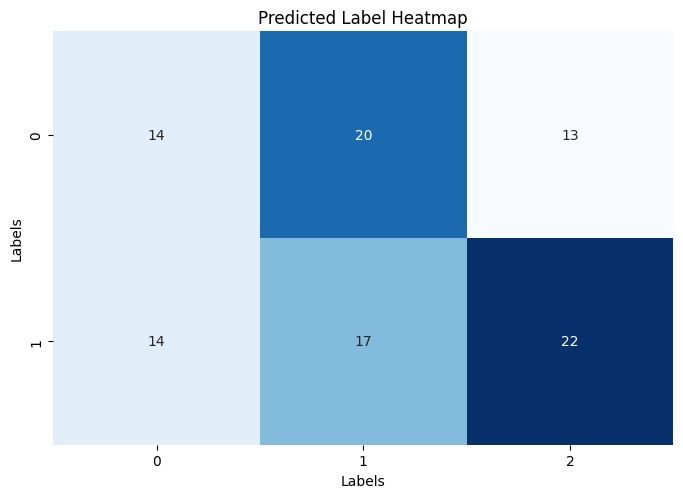

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example predicted labels
predicted_labels = np.random.randint(0, 6, size=(100,))  # Replace this with your actual predicted labels

# Compute the label frequencies
label_counts = np.bincount(predicted_labels)

# Reshape the label frequencies into a square matrix
heatmap_data = label_counts.reshape((int(np.sqrt(len(label_counts))), -1))

# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt="d", square=True, cbar=False)

# Set the title and labels
ax.set_title("Predicted Label Heatmap")
ax.set_xlabel("Labels")
ax.set_ylabel("Labels")

# Show the plot
plt.show()
